In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Proco Project/model_df.csv")

In [5]:
df.head()

,Year_of_experience,dp_score,npv,consultation_fee,MSc,PGD,MS,FDSRCS,BDS,DDVL,BAMS,MNAMS,PGDCC,DFFP,BNYS,DDPHN,DPMDB,MFGDP,FCPS,DNHE,PGDE,FFDRCSI,DNB,DHMS,FRANZCP,MRCP,DDV,DDHN,DTCD,FNB,DMD,Diplomate,DICOI,OBG,BSc,FRACP,FAM,FAICO,DCH,FCCM,MBBS,MRCOGUK,FICOI,MDS,DM,DVD,FICOG,MRCS,MScBSc,FMC,FICS,FRCPCH,FRCP,MD,MRCPCH,DOMS,MPH,FRCS,DPM,Diploma,DMDB,FACC,NDDY,DO,MCh,DGO,BHMS,FRCOG,FCCP,PhD,Speciality_Bariatric,Speciality_Cardiologist,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian,Speciality_Gastroenterologist,Speciality_Gynecologist,Speciality_Infertility Specialist,Speciality_Neurologist,Speciality_Neurosurgeon,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologists,Speciality_Urologist,Location_AECS Layout,Location_Akshaya nagar,Location_Alaknanda,Location_Anand Niketan,Location_Anand Vihar,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Ansari Nagar,Location_Arekere,Location_Ashok Vihar,Location_Ashok Vihar Phase 1,Location_Ashoknagar,Location_Avalahalli,Location_Azadpur,Location_BEL Layout,Location_BTM Layout,Location_BTM Layout 1st Stage,Location_BTM Layout 2nd Stage,Location_Bagalur,Location_Bali Nagar,Location_Banashankari,Location_Banashankari 1st Stage,Location_Banashankari 2nd Stage,Location_Banashankari 3rd Stage,Location_Banaswadi,Location_Bandra,Location_Bandra East,Location_Bandra West,Location_Bannerghatta Road,Location_Basavanagudi,Location_Basaveshwaranagar,Location_Begur,Location_Belathur,Location_Bellandur,Location_Bhandup,Location_Bhandup West,Location_Bhattarahalli,Location_Bhogal,Location_Bilekahalli,Location_Bommanahalli,Location_Bommasandra,Location_Borivali,Location_Borivali East,Location_Borivali West,Location_Brigade Road,Location_Burari,Location_CR Park,Location_CV Raman Nagar,Location_Chamarajpet,Location_Chanakyapuri,Location_Chandivali,Location_Chandra Layout,Location_Charni Road,Location_Chattarpur,Location_Chembur,Location_Chembur East,Location_Chembur West,Location_Chinchpokli,Location_Chira Bazaar,Location_Chirag Delhi,Location_Chitra Vihar,Location_Churchgate,Location_Colaba,Location_Connaught Place,Location_Cuffe Parade,Location_Cumballa Hill,Location_DLF Newtown,Location_DN Nagar,Location_Dadar,Location_Dadar East,Location_Dadar West,Location_Dahisar,Location_Dahisar East,Location_Dahisar West,Location_Dasarahalli,Location_Dashrath Puri,Location_Defence Colony,Location_Delhi,Location_Dilshad Garden,Location_Doddakammanahalli,Location_Domlur,Location_Dongri,Location_Durga Puri,Location_Dwarka,Location_Dwarka Sector 11,Location_Dwarka Sector 12,Location_Dwarka Sector 13,Location_Dwarka Sector 17,Location_Dwarka Sector 19,Location_Dwarka Sector 22,Location_Dwarka Sector 23,Location_Dwarka Sector 3,Location_Dwarka Sector 6,Location_Dwarka Sector 7,Location_Dwarka Sector 8,Location_Dwarka Sector 9,Location_East Of Kailash,Location_Electronics City,Location_Elphinstone Road,Location_Fort,Location_Frazer Town,Location_Ghatkopar,Location_Ghatkopar East,Location_Ghatkopar West,Location_Ghitorni,Location_Girgaon,Location_Goregaon,Location_Goregaon East,Location_Goregaon West,Location_Govandi,Location_Grant Road,Location_Greater Kailash,Location_Greater Kailash Part 1,Location_Greater Kailash Part 2,Location_Green Park,Location_Gubbalala,Location_Gujranwala Town,Location_Gulabi Bagh,Location_Gunjur,Location_HAL 2nd Stage,Location_HAL 3rd Stage,Location_HBR Layout,Location_HRBR Layout,Location_HSR Layout,Location_Hanumanthnagar,Location_Hari Nagar,Location_Harlur,Location_Harsh Vihar,Location_Hauz Khas,Location_Hebbal,Location_Hebbal Kempapura,Location_Hegde Nagar,Location_Hennur,Location_Hongasandra,Location_Hoodi,Location_Horamavu,Location_Hosur Road,Location_Hulimavu,Location_IP Extension,Location_Indiranagar,Location_JB Nagar,Location_JP Nagar,Location_JP Nagar 1 Phase,Location_JP Nagar 2 Phase,Location_JP Nagar 3 Phase,Location_JP Nagar 4 Pha

In [7]:
df.shape

(4666, 514)

In [6]:
df.isnull().sum()

Year_of_experience       0
dp_score                 0
npv                      0
consultation_fee         0
MSc                      0
                        ..
Location_Yojana Vihar    0
Location_Zakir Nagar     0
City_Bangalore           0
City_Delhi               0
City_Mumbai              0
Length: 514, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(df)

PCA()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

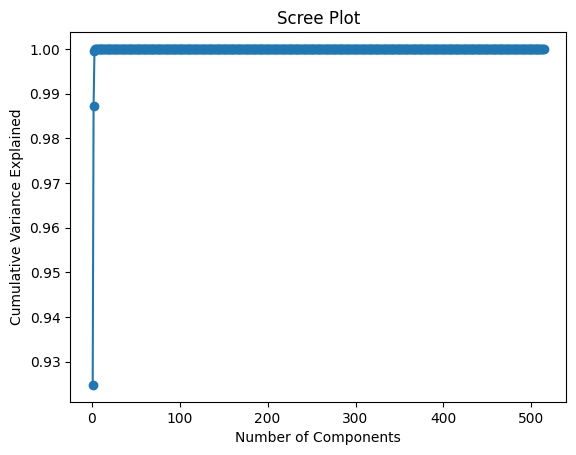

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot')
plt.show()


In [ ]:
pca = PCA(n_components=60)

In [ ]:
prin=pca.fit_transform(df.drop("consultation_fee",axis=1))

In [ ]:
prin_df=pd.DataFrame(data=prin)
prin_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.818167,-0.166279,0.985025,-0.189806,0.691258,-0.959729,-0.278544,-0.484480,-0.098151,-0.743664,-0.521515,0.262122,0.030419,-0.196019,-0.051732,-0.238665,0.149692,0.035199,0.488911,0.385294,0.041139,-0.079394,-0.000309,-0.004228,-0.023161,-0.004101,0.004809,-0.000864,0.001264,-0.013391,-0.007282,0.003566,-0.020333,-0.003699,-0.010467,0.002582,0.006909,-0.010546,0.006814,0.003343,0.003924,0.001740,0.006918,-0.000817,-0.002672,-0.001413,0.001081,-0.001744,0.000229,0.002445,-0.000435,0.002054,-0.003002,-0.000650,-0.000464,-0.000095,0.000516,-0.002046,0.001779,-0.001561
1,1.567541,0.725589,0.448252,0.105934,0.542570,-0.913121,-0.234784,-0.491892,-0.102353,-0.700350,-0.518627,0.223002,0.024183,-0.156330,-0.046009,-0.234948,0.132574,0.027095,0.495848,0.391961,0.028242,-0.074200,-0.000117,-0.016224,-0.040179,-0.006892,-0.004979,-0.003452,-0.008919,-0.017052,-0.013035,0.002966,-0.017487,-0.006072,-0.010421,0.006770,0.006406,-0.005649,0.002780,0.007387,0.006623,0.005783,0.003438,0.001219,-0.000535,-0.001091,0.002758,-0.003856,-0.003188,0.000255,0.001993,0.000720,-0.001301,0.000994,0.000246,-0.000521,0.001321,-0.001512,0.001746,-0.003934
2,-0.352928,-0.689014,-0.651060,0.591573,0.655626,-0.705716,-0.131033,-0.447257,-0.105302,-0.680612,-0.483140,0.231071,0.082269,-0.164828,-0.047436,-0.249939,0.145543,0.035488,0.472409,0.383468,0.041664,-0.062711,-0.000070,-0.008295,-0.012875,0.010979,-0.005929,0.002825,-0.002971,-0.026455,-0.010337,0.010270,-0.018546,0.000976,-0.006221,0.001060,0.014119,-0.009328,0.001102,-0.001577,0.003092,0.002546,0.003551,-0.001910,0.000644,0.002841,0.000783,0.001729,-0.000478,0.000548,0.000434,0.003940,0.000012,-0.000616,-0.000411,-0.000234,0.000307,-0.000074,0.000528,-0.001214
3,1.095424,-1.802906,-0.109972,0.972379,0.911177,-0.547178,-0.071446,-0.493501,-0.175357,-0.673630,-0.354065,0.217924,0.089253,-0.192823,-0.051212,-0.237823,0.178316,0.045726,0.435151,0.397315,0.057854,-0.035732,-0.000028,-0.012257,-0.016561,0.022632,-0.042918,0.027180,-0.013945,-0.017531,-0.018436,0.014693,-0.019472,-0.003789,-0.007955,-0.007078,0.006572,-0.002377,0.001085,-0.015346,0.002157,-0.001156,-0.004162,-0.000223,0.000801,0.003786,0.001821,-0.004721,0.000525,0.000569,0.002565,0.001407,0.001574,-0.001443,-0.000821,-0.002659,0.001088,0.000104,0.002401,-0.002145
4,-0.493839,0.796517,-1.451100,0.395888,0.340962,-0.826876,-0.162578,-0.407253,-0.042022,-0.664359,-0.601841,0.223145,0.073298,-0.118144,-0.040951,-0.259543,0.106180,0.021818,0.510529,0.373868,0.020008,-0.085081,-0.000009,-0.010715,-0.017897,-0.001122,0.023558,-0.021206,0.002079,-0.036832,-0.005718,0.005923,-0.016216,0.004296,-0.004519,0.010766,0.021019,-0.013332,-0.001002,0.013275,0.005319,0.008064,0.008957,-0.002472,0.001624,0.002179,0.000657,0.006740,-0.003155,-0.000606,-0.000319,0.005661,-0.000546,0.000990,0.000333,0.001816,-0.000019,0.000057,-0.001256,-0.001540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,2.649840,0.093100,1.290384,-0.662002,-0.269394,0.664450,0.380483,-0.881395,-0.181253,0.001661,0.004566,-0.242306,-0.040641,-0.052727,-0.115377,-0.011826,0.168904,0.060313,-0.218793,0.237529,0.152245,0.207114,0.000230,0.469698,-0.333150,-0.330508,0.525080,-0.328836,-0.071111,-0.111795,-0.108202,-0.059791,-0.016322,0.009377,-0.065056,-0.090291,0.009006,-0.002231,0.015986,0.014556,0.000654,0.009944,-0.009060,0.017214,-0.016479,-0.006179,-0.002078,-0.019265,-0.000729,-0.000739,0.004019,-0.007862,-0.002353,-0.015258,0.000015,-0.000998,-0.000518,0.009682,-0.003542,-0.000809
3202,1.743166,1.296644,0.542654,-0.913458,-0.546675,0.539797,0.342572,-0.835413,-0.115079,0.007956,-0.116371,-0.239434,-0.044624,-0.01

In [ ]:
sum(pca.explained_variance_ratio_)

0.9993718017759072

In [ ]:
df=pd.concat([prin_df,df["consultation_fee"]],axis=1)

In [ ]:
X = df.drop("consultation_fee",axis =1)
y = df['consultation_fee']

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Year_of_experience       0
dp_score                 0
npv                      0
consultation_fee         0
MSc                      0
                        ..
Location_Yojana Vihar    0
Location_Zakir Nagar     0
City_Bangalore           0
City_Delhi               0
City_Mumbai              0
Length: 514, dtype: int64

In [ ]:
#df.rename(columns = {'Degree_Encoded': 'Degree'}, inplace = True)

In [ ]:
df.shape

(4666, 514)

In [ ]:
X = df.drop("consultation_fee",axis =1)
y = df['consultation_fee']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import datasets, linear_model, metrics
from xgboost import XGBRFRegressor
from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
mod = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Support Vector Regression' : SVR(),
    'Ridge Regression' : Ridge(alpha=0.5),
    'Lasso Regression' : Lasso(alpha=0.1),
    'XGBoost model' : XGBRFRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor' : AdaBoostRegressor(n_estimators=100, random_state=42)
}

In [ ]:
for name, model in mod.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(f'mse: {mean_squared_error(y_test, y_pred)} rmse: {mean_squared_error(y_test, y_pred)**0.5}: r2_score: {r2_score(y_test, y_pred)}')
    print('***************************************')

Linear Regression
mse: 45791.49767825217 rmse: 213.9894802981029: r2_score: 0.5931419397768077
***************************************
Decision Tree Regressor
mse: 68784.09285714285 rmse: 262.2672165123633: r2_score: 0.3888524286603491
***************************************
Random Forest Regressor
mse: 39897.72539671428 rmse: 199.7441498435293: r2_score: 0.6455081841550206
***************************************
GradientBoostingRegressor
mse: 46138.944294000285 rmse: 214.7997772205555: r2_score: 0.5900548720179053
***************************************
Support Vector Regression
mse: 111069.33331458023 rmse: 333.27066074675736: r2_score: 0.013147510042782473
***************************************
Ridge Regression
mse: 43908.57658854888 rmse: 209.54373430992604: r2_score: 0.6098717184683192
***************************************
Lasso Regression
mse: 42621.76695699797 rmse: 206.45039829701943: r2_score: 0.6213050389997412
***************************************
XGBoost model
mse: 536

## GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## XGBoost Model

In [ ]:
xgb_model = XGBRFRegressor()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      predictor=None, random_state=None,
                                      reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
best_params

{'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 200}

In [ ]:
best_model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=5, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None, ...)

In [ ]:
XGB = XGBRFRegressor(gamma= 0,
 learning_rate= 0.2,
 max_depth= 7,
 min_child_weight= 1,
 n_estimators= 300)

In [ ]:
XGB.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = XGB.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_xgb )

-2.4180459080784

## DecisonTreeRegressor

In [ ]:
dc = DecisionTreeRegressor()

In [ ]:
dc.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_trai_d = dc.predict(X_train)

In [ ]:
metrics.r2_score(y_train,y_pred_trai_d )

0.9893716944741487

In [ ]:
y_pred_test_d = dc.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_test_d )

-0.09967545846326598

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree regressor
tree = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
best_model

DecisionTreeRegressor(max_depth=5)

In [ ]:
dc1 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=5)

In [ ]:
dc1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=5)

In [ ]:
y_pred_trai_d = dc1.predict(X_train)

In [ ]:
metrics.r2_score(y_train,y_pred_trai_d )

0.49655323725547296

In [ ]:
y_pred_test_d = dc1.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_test_d )

0.3647114912109447

In [ ]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best parameters:", best_params)
print("Best MSE:", mse)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best MSE: 109209.06679078829


## GradientBoostingRegressor

In [ ]:
gb_regressor = GradientBoostingRegressor()

In [ ]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)



In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_ = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_model

GradientBoostingRegressor(min_samples_leaf=4)

In [ ]:
gb_regressor1 = GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=5)

In [ ]:
gb_regressor1.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=5)

In [ ]:
y_pred_gb = gb_regressor1.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred_gb )

0.44724483401384574

## Lasso Model

In [ ]:
lasso =Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

In [ ]:
lasso_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+08, tolerance: 4.151e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+08, tolerance: 4.157e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+08, tolerance: 3.974e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 54, 55, 56, 57,
                                   58, 59, 60, 70, 75, 77, 80, 90, 95, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 1e-08}
-120270.96426737146
Lasso(alpha=1e-08)


In [ ]:
lasso =Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='r2',cv=10)

In [ ]:
lasso_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+08, tolerance: 4.151e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+08, tolerance: 4.157e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+08, tolerance: 3.974e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0, 1, 5,
                                   10, 20, 30, 35, 40, 45, 50, 54, 55, 56, 57,
                                   58, 59, 60, 70, 75, 77, 80, 90, 95, 100]},
             scoring='r2')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 1e-08}
0.4162061808099883
Lasso(alpha=1e-08)


In [ ]:
lasso_model = Lasso(alpha=0.1)

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_l = lasso_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_l )

100258.14506938907

In [ ]:
r2_score(y_test,y_pred_l)

0.4420708512475775

In [ ]:
lasso =Lasso()
parameters={'alpha':np.linspace(-3,3,20)}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

In [ ]:
lasso_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-pack

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)
print(lasso_regression.best_estimator_)

{'alpha': 0.1578947368421053}
-120444.81675395675
Lasso(alpha=0.1578947368421053)


In [ ]:
lasso_model = Lasso(alpha=0.157)

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.157)

In [ ]:
y_pred_l = lasso_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_l )

100228.30272523488

In [ ]:
r2_score(y_test,y_pred_l)

0.4422369216816474

In [ ]:
train_scores = []
test_scores = []

In [ ]:
alphas = np.linspace(-3,3,20)
alphas

array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e+06, tolerance: 4.613e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+06, tolerance: 4.613e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+07, tolerance: 4.613e

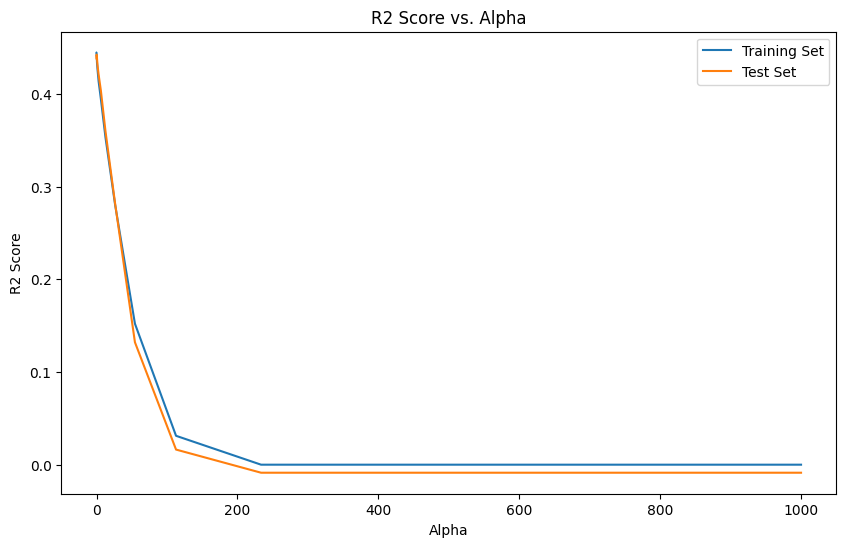

In [ ]:

# Define a range of alpha values to explore
alphas = np.logspace(-3, 3, num=20)

# Create empty lists to store the R2 scores for training and test sets
train_scores = []
test_scores = []

# Iterate over the alpha values, fit the model, and calculate the R2 scores
for alpha in alphas:
    model = Lasso(alpha = alpha)  # Use your desired model
    model.fit(X_train, y_train)

    # Calculate R2 scores for training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the R2 scores versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Training Set')
plt.plot(alphas, test_scores, label='Test Set')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
#plt.xscale('log')
plt.legend()
plt.title('R2 Score vs. Alpha')
plt.show()


## CV on Random Forest Model

In [ ]:
random_forest =RandomForestRegressor()
# parameters={'n_estimators':[100, 200 , 300], 'max_depth' : [3,5,7], 'criterion' : ['mse', 'mae']}
parameters={'n_estimators':[100, 200 , 300], 'max_depth' : [3,5,7]}
random_forest_regression=GridSearchCV(random_forest,parameters,scoring='r2',cv=5)

In [ ]:
random_forest_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
print(random_forest_regression.best_params_)
print(random_forest_regression.best_score_)
print(random_forest_regression.best_estimator_)

{'max_depth': 7, 'n_estimators': 200}
0.40136995554282223
RandomForestRegressor(max_depth=7, n_estimators=200)


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=7)

In [ ]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [ ]:
y_pred_r = random_forest_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_r )

103097.73616543831

In [ ]:
r2_score(y_test,y_pred_r)

0.42626873719562475

In [ ]:
#without passing any parameters

In [ ]:
random_forest_model2 = RandomForestRegressor()

In [ ]:
random_forest_model2.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_r2 = random_forest_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_r2)

103097.73616543831

In [ ]:
r2_score(y_test,y_pred_r2)

0.42626873719562475

In [ ]:
# Define the hyperparameters to tune and their ranges
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 5, 10],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
train_scores = []
test_scores = []


In [ ]:
# Iterate over the hyperparameter combinations, fit the Random Forest Regressor, and calculate the R2 scores
for params in param_grid.values():
    for param_value in params:
        # Create a dictionary with the current hyperparameter value
        param_dict = {list(param_grid.keys())[0]: param_value}

        # Create the Random Forest Regressor with the specified hyperparameters
        model = RandomForestRegressor(**param_dict)
        model.fit(X_train, y_train)

        # Predict on the training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate the R2 scores for training and test sets
        train_score = r2_score(y_train, train_pred)
        test_score = r2_score(y_test, test_pred)

        # Append the scores to the respective lists
        train_scores.append(train_score)
        test_scores.append(test_score)


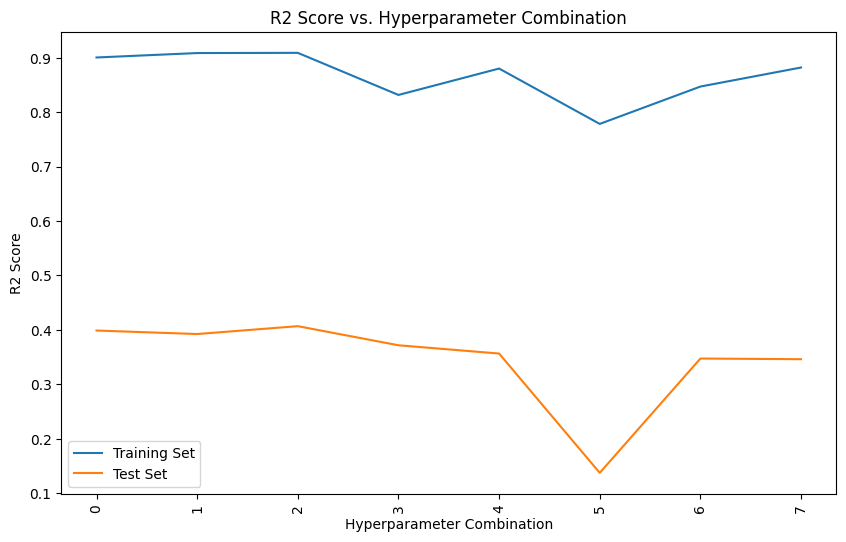

In [ ]:

# Plot the R2 scores versus the corresponding hyperparameter values
param_values = range(len(train_scores))

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Training Set')
plt.plot(param_values, test_scores, label='Test Set')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('R2 Score')
plt.legend()
plt.title('R2 Score vs. Hyperparameter Combination')
plt.xticks(param_values, rotation='vertical')
plt.show()

## Polynomial Regressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
degrees = [1, 2, 3,4,5]

In [ ]:
mse_scores = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    mse = -np.mean(cross_val_score(model, X_poly,y_train, scoring='neg_mean_squared_error', cv=3))
    mse_scores.append(mse)

In [ ]:
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

In [ ]:
best_degree = degrees[np.argmin(mse_scores)]
best_mse = np.min(mse_scores)

In [ ]:
print(best_mse,best_degree)

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 1.0],
    'gamma': ['scale', 'auto']
}

In [ ]:
svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best parameters:", best_params)
print("Best MSE:", mse)

In [ ]:
svr_model = SVR(kernel='linear',epsilon=1.0,gamma='scale',C=10.0)
svr_model.fit(X_train,y_train)

In [ ]:
y_pred=svr_model.predict(X_test)
r2_score(y_test,y_pred)

## CV on Ridge

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0,1,5,10,20,30,35,40,45,50,54,55,56,57,58,59,60,70,75,77,80,90,95,100]}
ridge_regression=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)

In [ ]:
ridge_regression.fit(X_train,y_train)

In [ ]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)
print(ridge_regression.best_estimator_)

In [ ]:
ridge_model =Ridge(alpha = 5)

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
y_pred_ri = ridge_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_ri)

In [ ]:
r2_score(y_test, y_pred_ri)

In [ ]:
# Base models
forest_model = RandomForestRegressor()
ridge_model = Ridge(alpha=5)
lasso_model = Lasso(alpha=0.157)

In [ ]:
# Model Averaging
models = [forest_model, ridge_model, lasso_model]
averaged_predictions = np.zeros_like(y_test)

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    averaged_predictions = averaged_predictions.astype('float64')
    averaged_predictions += predictions

averaged_predictions /= len(models)
averaged_mse = mean_squared_error(y_test, averaged_predictions)
averaged_r2 = r2_score(y_test, averaged_predictions)

print("Model Averaging MSE:", averaged_mse)
print("Model Averaging RMSE:", averaged_mse**0.5)
print("r2_score of Model Averaging", averaged_r2)

In [ ]:
# Stacking
meta_model = LinearRegression()
stacked_predictions = np.zeros_like(y_test)
models = [forest_model, ridge_model, lasso_model]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stacked_predictions = np.column_stack((stacked_predictions, predictions))

stacked_predictions = stacked_predictions[:, 1:]  # Remove the initial zeros column
meta_model.fit(stacked_predictions, y_test)
stacked_predictions = stacked_predictions.mean(axis=1)
stacked_mse = mean_squared_error(y_test, stacked_predictions)
stacked_r2 = r2_score(y_test, stacked_predictions)

print("Stacking MSE:", stacked_mse)
print("Sqrt of Stacking RMSE:", stacked_mse**0.5)
print("r2_score of Stacking:", stacked_r2)

In [ ]:
# Weighted Voting
weights = [0.7, 0.1, 0.2]  # Adjust the weights as desired
weighted_predictions = np.zeros_like(y_test)
models = [forest_model, ridge_model, lasso_model]
for model, weight in zip(models, weights):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    weighted_predictions = weighted_predictions.astype('float64')
    weighted_predictions += weight * predictions

weighted_mse = mean_squared_error(y_test, weighted_predictions)
weighted_r2 = r2_score(y_test, weighted_predictions)

print("Weighted Voting MSE:", weighted_mse)
print("Weighted Voting RMSE:", weighted_mse**0.5)
print("r2_score of Weighted Voting:", weighted_r2)

In [ ]:
X_train

In [ ]:
num = ['Year_of_experience', 'dp_score', 'npv' ]

## AdaBoost Regressor Model

In [ ]:
param_grid = {
    'n_estimators': [200,300,400,500],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}
base_estimator = DecisionTreeRegressor()

# Create the AdaBoost regressor
adaboost = AdaBoostRegressor(base_estimator=base_estimator)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2S=r2_score(y_test,y_pred)
print("Best parameters:", best_params)
print("Best MSE:", mse)
print("R2 Score",r2S)